In [1]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np

## Spectral clustering w/ sklearn

In [2]:
# def my_affinity(X):
#     # Compute the pairwise Euclidean distances between data points
#     dist = euclidean_distances(X)

#     # Convert distances to similarity scores using the Gaussian kernel
#     gamma = 1.0 / (2 * (np.std(dist) ** 2))
#     affinity = np.exp(-gamma * (dist ** 2))

#     return affinity
    
def my_affinity(X):
    # Compute the pairwise Euclidean distances between data points
    dist = euclidean_distances(X)

    # Convert distances to similarity scores using the Gaussian kernel
    gamma = 1.0 / (2 * (np.std(dist) ** 2))
    affinity = np.exp(-gamma * (dist ** 2))

    return affinity

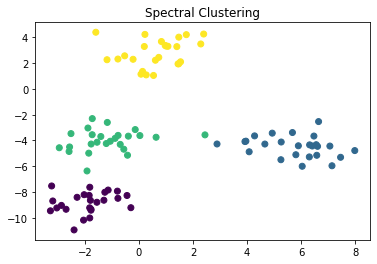

In [3]:
# Generate data
X, y = make_blobs(n_samples=100, centers=4, random_state=40)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


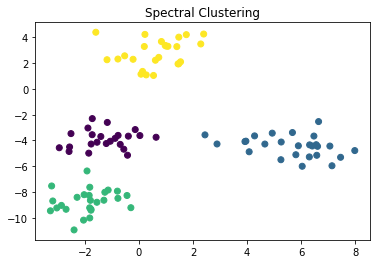

In [4]:
# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', eigen_solver='arpack')
y_pred = sc.fit_predict(X)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()


In [5]:
# affinity matrix
A = my_affinity(X)

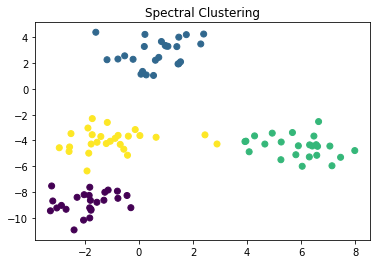

In [6]:
# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=4, affinity='precomputed', eigen_solver='arpack')
y_pred = sc.fit_predict(A)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()


## Spectral clustering w/o sklearn

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def similarity_matrix(X, sigma):
    # Compute the pairwise Euclidean distances between data points
    dist = np.sqrt(np.sum((X[:, np.newaxis] - X) ** 2, axis=-1))

    # Convert distances to similarity scores using the Gaussian kernel
    sim = np.exp(-(dist ** 2) / (2 * (sigma ** 2)))

    return sim

def laplacian_matrix(sim):
    # Compute the degree matrix
    deg = np.diag(np.sum(sim, axis=1))

    # Compute the Laplacian matrix
    lap = deg - sim

    return lap

def spectral_clustering(X, n_clusters, sigma):
    # Compute the similarity matrix
    sim = similarity_matrix(X, sigma)

    # Compute the Laplacian matrix
    lap = laplacian_matrix(sim)

    # Compute the eigenvectors and eigenvalues of the Laplacian
    eigvals, eigvecs = np.linalg.eigh(lap)

    # Sort the eigenvectors according to their eigenvalues
    idx = np.argsort(eigvals)
    eigvecs = eigvecs[:, idx]

    # Use the smallest eigenvectors to construct the embedding
    embedding = eigvecs[:, :n_clusters]

    # Cluster the embedded data using k-means
    centroids, labels = k_means(embedding, n_clusters)

    return labels

def k_means(X, n_clusters, max_iter=10000):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    # Iterate until convergence or maximum number of iterations
    for i in range(max_iter):
        # Assign each point to the closest centroid
        distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=-1))
        labels = np.argmin(distances, axis=-1)

        # Update the centroids
        for j in range(n_clusters):
            centroids[j] = np.mean(X[labels == j], axis=0)

    return centroids, labels


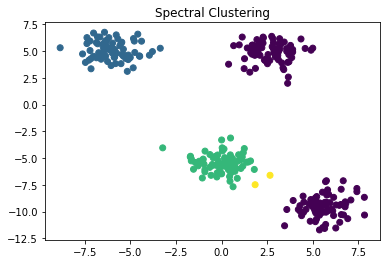

In [8]:

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=10)

# Apply Spectral Clustering
n_clusters = 4
sigma = 1.0
y_pred = spectral_clustering(X, n_clusters, sigma)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()


In [9]:
y_pred

array([0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0,
       0, 0, 2, 1, 1, 1, 2, 1, 0, 3, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1,
       0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 3, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1])

In [10]:
def random_unit_vectors(n, d):
    """
    Generates n random d-dimensional vectors with unit norm.

    Parameters:
    - n: the number of vectors to generate
    - d: the dimension of the vectors

    Returns:
    - vectors: a 2D array of shape n x d containing the random vectors
    """
    vectors = np.random.randn(n, d)
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    vectors /= norms
    return vectors
    
def my_affinity(U, V):
    # Compute the pairwise Euclidean distances between data points
    Z = U@np.transpose(V)
    Z_T = np.transpose(Z)

    d = np.diag(Z)
    Z_sub = np.transpose(d*np.ones((len(d), len(d))))
    
    affinity =  Z + Z_T -2*Z_sub

    return affinity

In [11]:
U = random_unit_vectors(100,2)
V = random_unit_vectors(100,2)

In [12]:
affinity = my_affinity(U,V)

In [13]:
affinity

array([[ 0.        , -0.65113953, -2.41527609, ..., -1.07373396,
        -1.32748248,  0.53642962],
       [-0.33079391,  0.        , -1.95456843, ..., -2.62179052,
        -1.83475289, -1.22748804],
       [-3.36798957, -3.22762753,  0.        , ..., -1.21119449,
        -1.94902401, -2.56643814],
       ...,
       [ 0.42667694, -1.44172523,  1.24192988, ...,  0.        ,
        -0.66839294,  1.3182822 ],
       [ 1.59635042,  0.7687344 ,  1.92752237, ...,  0.75502907,
         0.        ,  2.75714166],
       [ 0.0272496 , -2.05701368, -2.12290468, ..., -0.69130872,
        -0.67587127,  0.        ]])

In [14]:
# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=4, affinity='precomputed', eigen_solver='arpack')
y_pred = sc.fit_predict(affinity)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/scipy/sparse/csgraph/_laplacian.py:118: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: array must not contain infs or NaNs